In [98]:
import numpy as np 
import pandas as pd 
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [99]:
data = pd.read_csv('AAPL.csv')
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10416 non-null  object 
 1   Low             10416 non-null  float64
 2   Open            10416 non-null  float64
 3   Volume          10416 non-null  int64  
 4   High            10416 non-null  float64
 5   Close           10416 non-null  float64
 6   Adjusted Close  10416 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 569.8+ KB


In [100]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()


C:\Users\Hufal\AppData\Local\Temp/ipykernel_23124/552766564.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.100323
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.095089
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.088110
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.090291
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092908


In [101]:
data.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [102]:
df=data

In [103]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

8251
2063


In [104]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.utils import plot_model


In [112]:
model = tf.keras.Sequential()
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])


In [113]:
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
207/207 [==============================] - 18s 45ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.1109 - val_loss: 0.0069 - val_mse: 0.0069 - val_mae: 0.0694
Epoch 2/40
207/207 [==============================] - 7s 34ms/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0820 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0502
Epoch 3/40
207/207 [==============================] - 7s 35ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0826 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0451
Epoch 4/40
207/207 [==============================] - 7s 33ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0797 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0444
Epoch 5/40
207/207 [==============================] - 7s 31ms/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0766 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0465
Epoch 6/40
207/207 [==============================] - 7s 32ms/step - loss: 0.0108 - mse: 0.0108 - mae: 0.0764 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0421
Epoch 7/4

In [114]:
model.evaluate(test_X, test_Y)

65/65 [==============================] - 1s 10ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0486


[0.004101017490029335, 0.004101017490029335, 0.04861331358551979]

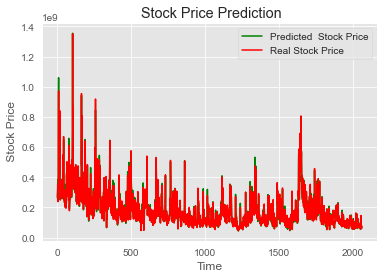

In [115]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [116]:
model.save("model.h5")

In [117]:
from tensorflow import keras
yActual = test_label
yPredicted = predicted
 
mapeObject = keras.losses.MeanAbsolutePercentageError()
mapeTensor = mapeObject(yActual, yPredicted)
mape = mapeTensor.numpy()
 
print(mape)

4.3555474
